In [1]:
import sys
sys.path.insert(0, "../..")

import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

from module.base.network import Network
from module.simulation.meanfield import MeanField
import module.components.CONST as CONST

/tmp/ipykernel_457/4136295701.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
def set_size(width = "thesis", fraction=1, subplots=(1, 1)):
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [3]:
all_kmc_means = []
all_mf_means = []
all_mf2_means = []
all_mf2_vars = []

all_kmc_currents = []
all_mf_currents = []
all_mf2_currents = []

all_kmc_steps = []

In [4]:
MAEs = []

rel_errs = []
u_rel_errs = []

MAEs_2 = []

rel_errs_2 = []
u_rel_errs_2 = []

In [5]:
net_sizes = np.arange(2, 11)

In [6]:
KMC_acc = 0.005

In [7]:
for size_index in range(0, 9):
    N = net_sizes[size_index]
    size_str = str(N) + "x" + str(N) + ".csv"

    ## Load MF data
    mf_means = np.loadtxt("../../data/large_sys/mf/mf_states" + size_str)
    mf_convergence = np.loadtxt("../../data/large_sys/mf/mf_convergence" + size_str)
    mf_currents = np.loadtxt("../../data/large_sys/mf/mf_currents" + size_str)

    ## Load MF2 data
    mf2_means = np.loadtxt("../../data/large_sys/mf2/entropy_means" + size_str)
    mf2_currents = np.loadtxt("../../data/large_sys/mf2/entropy_currents" + size_str)
    mf2_vars = np.loadtxt("../../data/large_sys/mf2/entropy_vars"+ size_str)

    ## Load KMC data
    kmc_means = np.loadtxt("../../data/large_sys/kmc_combined/kmc_states" + size_str)
    kmc_steps = np.loadtxt("../../data/large_sys/kmc/kmc_steps" + size_str)
    kmc_currents = np.loadtxt("../../data/large_sys/kmc_combined/kmc_currents" + size_str)
    kmc_errs = np.loadtxt("../../data/large_sys/kmc/kmc_errs" + size_str)


    ## means for images
    all_kmc_means.append(kmc_means)
    all_mf_means.append(mf_means)
    all_mf2_means.append(mf2_means)
    all_kmc_steps.append(kmc_steps)

    ## variances
    all_mf2_vars.append(mf2_vars)

    ## currents
    all_kmc_currents.append(kmc_currents)
    all_mf_currents.append(mf_currents)
    all_mf2_currents.append(mf2_currents)

    ## accuracies
    MAE = np.abs(mf_means - kmc_means)

    MAE2 = np.abs(mf2_means - kmc_means)

    rel_err = np.abs((mf_currents - kmc_currents)/kmc_currents)
    u_rel_err = np.abs(mf_currents / kmc_currents) * KMC_acc

    rel_err2 = np.abs((mf2_currents - kmc_currents)/kmc_currents)
    u_rel_err2 = np.abs(mf2_currents / kmc_currents) * KMC_acc

    
    cond1 = np.abs(kmc_currents) > 0.01
    cond2 = rel_err < 0.6
    cond3 = rel_err2 < 0.6
    cond4 = np.abs(kmc_currents) < 20
    cond = np.logical_and(np.logical_and(np.logical_and(cond1, cond2), cond3), cond4)
    valid = np.where(cond)[0]

    MAEs.append(MAE[valid].flatten())       # flatten out island dimension

    rel_errs.append(rel_err[valid])
    u_rel_errs.append(u_rel_err[valid])

    MAEs_2.append(MAE2[valid].flatten())

    rel_errs_2.append(rel_err2[valid])
    u_rel_errs_2.append(u_rel_err2[valid])


In [8]:
mf_MAEs = [np.mean(maes) for maes in MAEs]
qmf2_MAEs = [np.mean(maes) for maes in MAEs_2]

In [9]:
mf_errs = [np.mean(rel_err) for rel_err in rel_errs]
u_mf_errs = [1/len(rel_errs[i])*np.sqrt(np.sum(u_rel_errs[i]**2)) for i in range(len(rel_errs))]

qmf2_errs = [np.mean(rel_err) for rel_err in rel_errs_2]
u_qmf2_errs = [1/len(rel_errs_2[i])*np.sqrt(np.sum(u_rel_errs_2[i]**2)) for i in range(len(rel_errs_2))]

In [10]:
print(np.mean(mf_errs))
print(1/len(u_mf_errs)*np.sqrt(np.sum(np.array(u_mf_errs)**2)))

0.10475690852489537
0.00016334612213288392


In [11]:
print(np.mean(qmf2_errs))
print(1/len(u_qmf2_errs)*np.sqrt(np.sum(np.array(u_qmf2_errs)**2)))

0.03525351001306554
0.00017983388382027113


In [12]:
np.mean(mf_MAEs)

0.060519772297840696

In [13]:
np.mean(qmf2_MAEs)

0.041323159017188714

In [14]:
for i in range(0, 9):
    N = net_sizes[size_index]

    print("N =", N, "MF1 RE =", mf_errs[i]*100, u_mf_errs[i]*100, "QMF2 RE =", qmf2_errs[i]*100, u_qmf2_errs[i]*100)

N = 10 MF1 RE = 6.728061690285786 0.04920086905077374 QMF2 RE = 2.8937744883148433 0.05088145636728235
N = 10 MF1 RE = 7.819941328284333 0.050297635469913185 QMF2 RE = 2.290385046443447 0.05336626212440825
N = 10 MF1 RE = 9.201581507629713 0.04858201264946773 QMF2 RE = 2.5071857678694833 0.05186914461683002
N = 10 MF1 RE = 10.533357277824962 0.048130969764513 QMF2 RE = 3.0197132052984443 0.05250463476397448
N = 10 MF1 RE = 11.660817105882005 0.04927271555704943 QMF2 RE = 3.440544116175622 0.05486072743950976
N = 10 MF1 RE = 12.041219975103475 0.047743461643035535 QMF2 RE = 3.290454661114392 0.0535753723115634
N = 10 MF1 RE = 12.38871945390653 0.050012540748984334 QMF2 RE = 4.1364830541736675 0.057170699255548935
N = 10 MF1 RE = 12.39801167111006 0.04960298166259802 QMF2 RE = 4.623996635739365 0.05635579220441584
N = 10 MF1 RE = 11.509507662378967 0.048125414762507986 QMF2 RE = 5.52562203662972 0.05465412520174323


In [15]:
for i in range(0, 9):
    N = net_sizes[i]

    print("N =", N**2, "MF1 MAE =", mf_MAEs[i]*100, "QMF2 MAE =", qmf2_MAEs[i]*100)

N = 4 MF1 MAE = 5.4050993271435255 QMF2 MAE = 5.540001040143707
N = 9 MF1 MAE = 4.308940738784981 QMF2 MAE = 2.930962487348263
N = 16 MF1 MAE = 5.119269978554296 QMF2 MAE = 2.9629802745555716
N = 25 MF1 MAE = 5.050756294439037 QMF2 MAE = 2.5390840947923565
N = 36 MF1 MAE = 5.745376879967994 QMF2 MAE = 3.1446357514816308
N = 49 MF1 MAE = 6.330080944993634 QMF2 MAE = 3.9192615950792193
N = 64 MF1 MAE = 7.0526682218515155 QMF2 MAE = 4.575720539994362
N = 81 MF1 MAE = 7.549678455592035 QMF2 MAE = 5.564186151285747
N = 100 MF1 MAE = 7.905924226729607 QMF2 MAE = 6.01401118078898


### Accuracy wrt. KMC

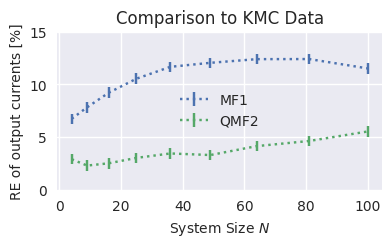

In [16]:
plt.figure(figsize=set_size(fraction=0.7))
plt.errorbar(net_sizes**2, np.array(mf_errs)*100, yerr = 0.5, label = "MF1", linestyle = "dotted")
plt.errorbar(net_sizes**2, np.array(qmf2_errs)*100,yerr = 0.5, label = "QMF2", linestyle = "dotted")
plt.ylabel("RE of output currents [%]")
plt.xlabel("System Size $N$")

plt.ylim(0,15)
plt.title("Comparison to KMC Data")
plt.legend()
plt.tight_layout(pad = 1)
plt.savefig("../../output/large_sys/accuracy_current.pdf")

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (9,) + inhomogeneous part.

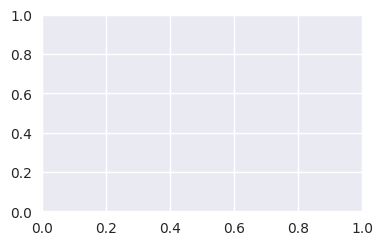

In [17]:
plt.figure(figsize=set_size(fraction=0.7))
plt.plot(net_sizes**2, MAEs, marker = "o", label = "MF1")
plt.plot(net_sizes**2, MAEs_2, marker = "o", label = "QMF2")
plt.xlabel("System Size $N$")
plt.ylabel("MAE of $\\langle n \\rangle$")

plt.ylim(0,0.1)
plt.title("Comparison to KMC Data")
plt.legend()
plt.tight_layout(pad = 1)
plt.savefig("../../output/large_sys/accuracy_mean.pdf")

### Visual Mean Comparison

In [18]:
size_index = 8
size = net_sizes[size_index]

In [79]:
i = np.random.randint(0, 100)
i = 20

kmc_im = all_kmc_means[size_index][i].reshape(size, size)
mf_im = all_mf_means[size_index][i].reshape(size, size)
mf2_im = all_mf2_means[size_index][i].reshape(size, size)
large_im = np.concatenate((kmc_im, mf_im, mf2_im), axis = 1)

In [80]:
v = np.loadtxt("../../data/large_sys/voltage_configs.csv")
print(v[i])

[-0.10144854 -0.08662581 -0.11540644  0.17801101  0.04419941]


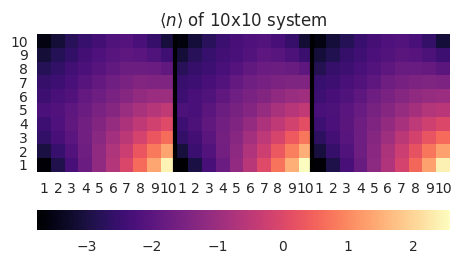

In [81]:
plt.figure(figsize=set_size(fraction = 0.8))
plt.imshow(large_im, cmap = "magma")
plt.yticks(np.arange(size), np.arange(size, 0, - 1))
plt.xticks(np.arange(size * 3), np.arange(size * 3) % size + 1 )
plt.axvline(size-0.5, color = "black", linewidth = 3)
plt.axvline(2*size-0.5, color = "black", linewidth = 3)
plt.grid()
plt.title("$\\langle n \\rangle$ of "+str(size)+"x"+str(size)+" system")
cbar = plt.colorbar(orientation = "horizontal")
# cbar.ax.get_xaxis().labelpad = 15
# cbar.ax.set_xlabel('$\\langle n \\rangle$', rotation = 00)
plt.tight_layout()
plt.savefig("../../output/large_sys/visual_states"+str(size)+"x"+str(size)+".pdf")

---

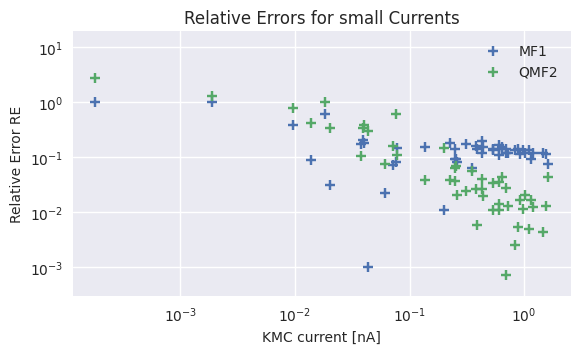

In [38]:
plt.figure(figsize=set_size())

plt.scatter(all_kmc_currents[-1], np.abs((all_kmc_currents[-1] - all_mf_currents[-1])/all_kmc_currents[-1]), marker = "+", label = "MF1")
plt.scatter(all_kmc_currents[-1], np.abs((all_kmc_currents[-1] - all_mf2_currents[-1])/all_kmc_currents[-1]), marker = "+", label = "QMF2")

plt.xlabel("KMC current [nA]")
plt.ylabel("Relative Error RE")
plt.yscale("log")
plt.xscale("log")
plt.title("Relative Errors for small Currents")
plt.legend()
plt.tight_layout()
plt.savefig("../../output/large_sys/small_current_errors.pdf")